# Heart Disease

_Dataset Link: https://www.kaggle.com/ronitf/heart-disease-uci_

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their [website](https://www.cdc.gov/heartdisease/facts.htm):

* About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
* Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
* Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.

For more information, you can look at the website of the Centers for Disease Control and Prevention: [preventing heart disease](https://www.cdc.gov/heartdisease/prevention.htm)

## Problem description
The goal is to predict the binary class `heart_disease_present`, which represents whether or not a patient has heart disease:

* `0` represents no heart disease present
* `1` represents heart disease present

## Attribute Information:

There are 14 columns in the dataset, where **`heart_disease_present`** is the variable we want to predict and the rest of the columns are described in the section below.

* **`age`** (type: int): age in years
* **`sex`** (type: binary): 0: female, 1: male
* **`chest_pain_type`** (type: int): chest pain type (4 values)
* **`resting_blood_pressure`** (type: int): resting blood pressure
* **`serum_cholesterol_mg_per_dl`** (type: int): serum cholestoral in mg/dl
* **`fasting_blood_sugar_gt_120_mg_per_dl`** (type: binary): fasting blood sugar > 120 mg/dl
* **`resting_ekg_results`** (type: int): resting electrocardiographic results (values 0,1,2)
* **`max_heart_rate_achieved`** (type: int): maximum heart rate achieved (beats per minute)
* **`exercise_induced_angina`** (type: binary): exercise-induced chest pain (0: False, 1: True)
* **`oldpeak_eq_st_depression`** (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* **`slope_of_peak_exercise_st_segment`** (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* **`num_major_vessels`** (type: int): number of major vessels (0-3) colored by flourosopy
* **`thal`** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect


## Exploring the dataset

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
heart = pd.read_csv('DATA/heart_disease.csv')

In [3]:
# Returns the first x number of rows when head(num). Without a number it returns 5
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Change the columns names to get more context from it
column_names = ['age','sex','chest_pain_type','resting_blood_pressure','serum_cholesterol_mg_per_dl',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','max_heart_rate_achieved',
               'exercise_induced_angina','oldpeak_eq_st_depression','slope_of_peak_exercise_st_segment',
               'num_major_vessels','thal','heart_disease_present'] 

heart.columns = column_names

In [5]:
# Returns basic information on all columns
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest_pain_type                       303 non-null    int64  
 3   resting_blood_pressure                303 non-null    int64  
 4   serum_cholesterol_mg_per_dl           303 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  303 non-null    int64  
 6   resting_ekg_results                   303 non-null    int64  
 7   max_heart_rate_achieved               303 non-null    int64  
 8   exercise_induced_angina               303 non-null    int64  
 9   oldpeak_eq_st_depression              303 non-null    float64
 10  slope_of_peak_exercise_st_segment     303 non-null    int64  
 11  num_major_vessels  

There are 303 instances in the dataset, which means that it is small by
Machine Learning standards.

In [6]:
# Returns basic statistics on numeric columns
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
serum_cholesterol_mg_per_dl,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar_gt_120_mg_per_dl,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting_ekg_results,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak_eq_st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Notice that there are some attributes that are taking numeric values when they are categorical. We will deal with these later

In [7]:
# Returns the sum of missing values of each column
heart.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholesterol_mg_per_dl             0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
oldpeak_eq_st_depression                0
slope_of_peak_exercise_st_segment       0
num_major_vessels                       0
thal                                    0
heart_disease_present                   0
dtype: int64

Notice that there are no missing values 

## Visual Exploratory Data Analysis (EDA)
It’s time to visualize our data with a little help from the seaborn package.
From the frequency plot of heart disease below, we see that the two classes (0: No Heart Disease Present and 1: Heart Disease Present) are approximately balanced, with 55% of observations having heart disease and the remaining population not having heart disease.

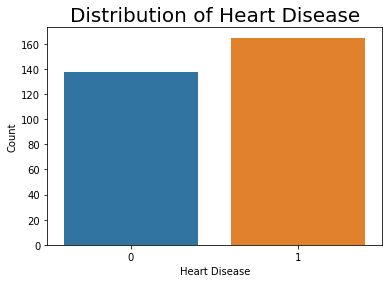

In [8]:
sns.countplot(heart['heart_disease_present'])
plt.title('Distribution of Heart Disease',fontsize = 20, fontweight = 30)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

The data is relatively well-balanced, so we won’t take any steps here to equalize the classes.

Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). 

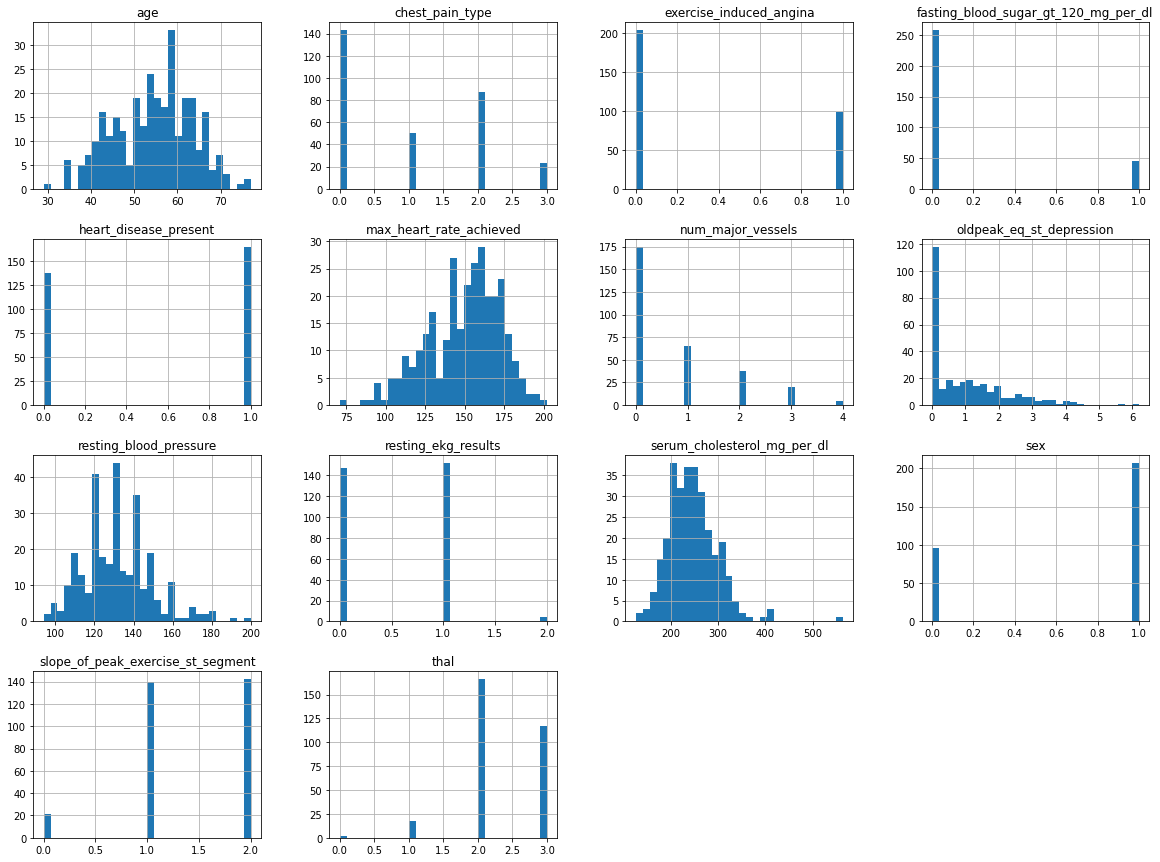

In [9]:
heart.hist(bins=30,figsize=(20,15))
plt.show()

### Create a Test Set
Before continuing with more EDA, first we proceed to set aside part of the data at this stage in order not to commit snooping bias 

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(heart, test_size=0.2, random_state=42)

In [11]:
heart = train_set.copy()

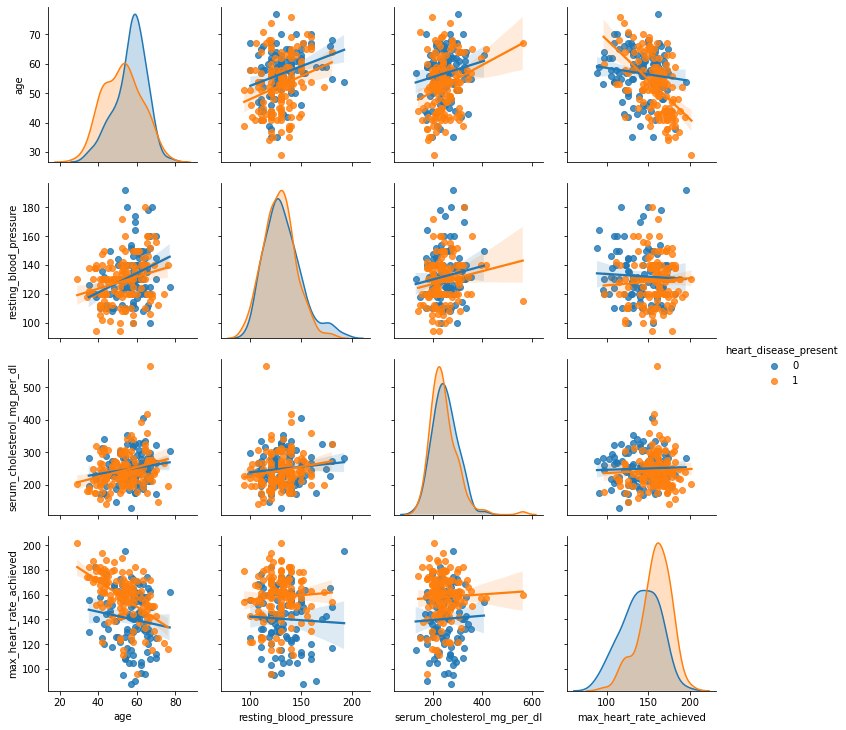

In [12]:
attributes = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl','max_heart_rate_achieved', 
              'num_major_vessels','heart_disease_present']

sns.pairplot(heart[attributes], hue='heart_disease_present', vars=attributes[0:-2],kind='reg')

The pairplot above allows us to see the distribution and relationship of numerical variables. The diagonal shows kernel density plots showing the rough distributions of the two populations. The scatter plots show relationship between plots. We can make a couple observations from the pairplot:

* Resting blood pressure tends to increase with age regardless of heart disease.
* We can see that the age is lower for people without heart disease.
* We can see that max heart rates is lower for people without heart disease.


Using correlation to see features that are highly correlated

In [13]:
corr_matrix = heart.corr()

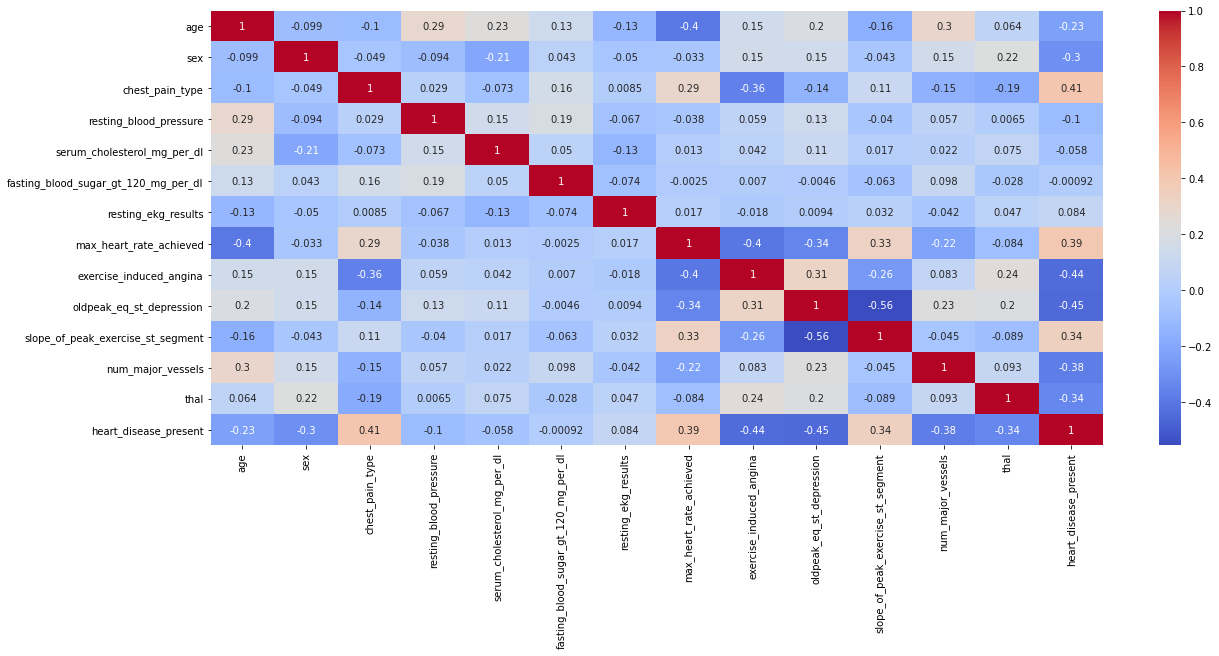

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

Now we want to se more closely features that are highly correlated to the target(here, heart_disease_present)

In [15]:
corr_matrix['heart_disease_present'][:-1].sort_values()

oldpeak_eq_st_depression               -0.447305
exercise_induced_angina                -0.443217
num_major_vessels                      -0.375391
thal                                   -0.338054
sex                                    -0.304156
age                                    -0.233782
resting_blood_pressure                 -0.104257
serum_cholesterol_mg_per_dl            -0.057714
fasting_blood_sugar_gt_120_mg_per_dl   -0.000924
resting_ekg_results                     0.084031
slope_of_peak_exercise_st_segment       0.341576
max_heart_rate_achieved                 0.393415
chest_pain_type                         0.407768
Name: heart_disease_present, dtype: float64

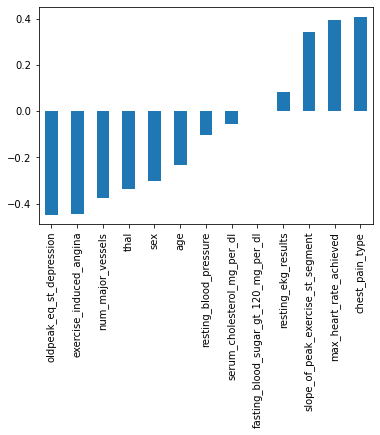

In [16]:
corr_matrix['heart_disease_present'][:-1].sort_values().plot(kind="bar")

It can be observed from the heatmap and the bar chart that max_heart_rate_achieved correlated to the target, having '0.39'. so lets look at the feature more closely with the chest pain type where:
* `0` = typical angina
* `1` = atypical angina
* `2` = non-anginal angina
* `3` = asymptomatic angina

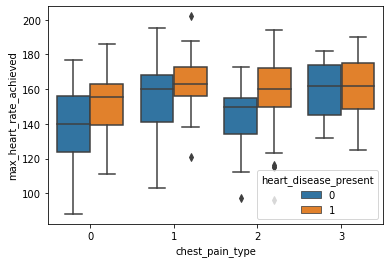

In [17]:
sns.boxplot(x="chest_pain_type", y="max_heart_rate_achieved", data=heart,hue='heart_disease_present')

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. We can make a couple observations from it:

* The values of max heart rate tent to be higher for people with heart disease independely the type of chest pain (except for asymptomatic angina)
* We can see that when there is a  age is non-anginal angina chest pain the max heart rate tent to be significally higher for with heart disease.

## Model Building

### Prepare the Data for Machine Learning Algorithms

In [18]:
heart = train_set.drop('heart_disease_present',axis=1)
heart_labels = train_set['heart_disease_present'].copy()

### Data Cleaning
As we saw earlier there is no missing values so there is no need for data cleaning.

### Handling Numerical and Categorical Attributes
We need to scale the numerical values as machine Learning algorithms don’t perform well when this attributes have very different scales. 

And for the categorical attributes for categorical variables in this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [20]:
# Select numerical columns
numerical_cols = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'resting_ekg_results', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression','num_major_vessels']


# Select categorical columns 
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar_gt_120_mg_per_dl','exercise_induced_angina',
               'slope_of_peak_exercise_st_segment','thal']

In [21]:
full_pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(), numerical_cols),
    ("onehot", OneHotEncoder(sparse=False), categorical_cols)
 ])

heart_prepared = full_pipeline.fit_transform(heart)

### Select and Train a Model

#### Training and Evaluating on the Training Set
As a evaluation metric I choose roc_auc to showing purpuses that we care equally about positive and negative classes.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [23]:
# evaluate each model in turn
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto',probability=True)))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGC', XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, heart_prepared, heart_labels, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.907018 (0.052023)
CART: 0.706329 (0.070752)
SVM: 0.897962 (0.052345)
RFC: 0.894196 (0.062296)
XGC: 0.876439 (0.081547)


Text(0.5, 1.0, 'Algorithm Comparison ')

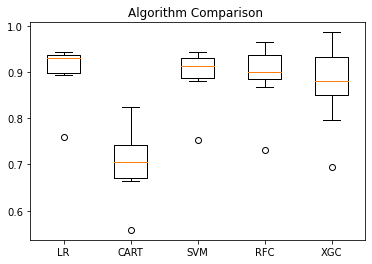

In [24]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison ')

Note: Since the Logistic Regresion algorithm has the best roc_auc score and small variance, we futher fine tune the model using hyperparameter optimization.

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],   
              'penalty': ['l2', 'l1']}  
  

model =  LogisticRegression(solver='liblinear', multi_class='ovr')
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)    
grid_search = GridSearchCV(model, param_grid, cv=kfold,
                           scoring='roc_auc',
                           return_train_score=True)
grid_search.fit(heart_prepared, heart_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2', 'l1']},
             return_train_score=True, scoring='roc_auc')

In [26]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

After choosing the best parameters we proceed to use them to evaluate the final model with data that the algorithm havent seen

In [27]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("heart_disease_present", axis=1)
y_test = test_set["heart_disease_present"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_roc = roc_auc_score(y_test, final_predictions)

In [28]:
final_roc

0.9030172413793103

The next tables and graphics show that the model is pretty good making predictions with new data

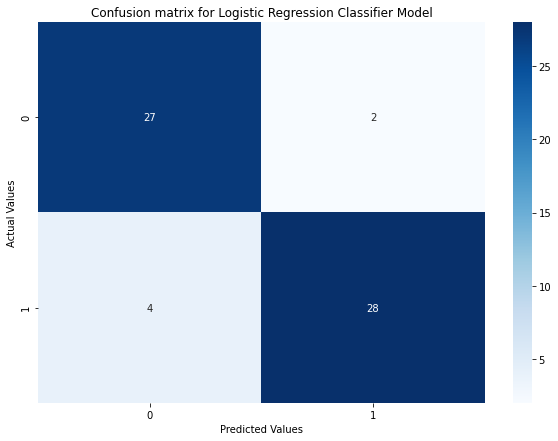

In [29]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Logistic Regression Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [30]:
# Evaluate predictions
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



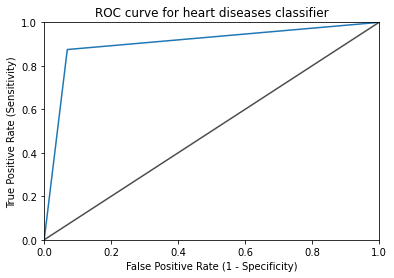

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, final_predictions)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for heart diseases classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [32]:
import IPython

# print system information (but not packages)
print(IPython.sys_info())

# get module information
!pip freeze > frozen-requirements.txt

# append system information to file
with open("frozen-requirements.txt", "a") as file:
    file.write(IPython.sys_info())

{'commit_hash': 'd0b255042',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'C:\\Users\\Diego\\miniconda3\\lib\\site-packages\\IPython',
 'ipython_version': '7.13.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.18362-SP0',
 'sys_executable': 'C:\\Users\\Diego\\miniconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit '
                '(AMD64)]'}
